In [1]:
import json
import pandas as pd
from yelpapi import YelpAPI

In [14]:
# Load API Credentials
with open('/Users/James/OneDrive/Desktop/yelp_api.json') as f:   #use your path here!
    login = json.load(f)
# Instantiate YelpAPI Variable
yelp_api = YelpAPI(login['api-key'], timeout_s=5.0)

In [15]:
with open("/Users/James/OneDrive/Desktop/yelp_api.json") as f:
    login = json.load(f)
login.keys()

dict_keys(['client-id', 'api-key'])

In [16]:
yelp_api = YelpAPI(login['api-key'], timeout_s=5.0)
yelp_api

In [17]:
results = yelp_api.search_query(location='Denver, CO',
                                       term='Green Chili')
type(results)
results.keys()

dict_keys(['businesses', 'total', 'region'])

In [21]:
JSON_FILE = "Data/results_in_progress_Denver_Green_Chili.json"
JSON_FILE

'Data/results_in_progress_Denver_Green_Chili.json'

In [5]:
# Assuming 'results' is the dictionary you obtained from the Yelp API
businesses = results['businesses']

# Iterate through each business and print relevant information
for business in businesses:
    name = business['name']
    rating = business['rating']
    address = ', '.join(business['location']['display_address'])

    print(f"Name: {name}")
    print(f"Rating: {rating}")
    print(f"Address: {address}")
    print("\n")

Name: Park Avenue Tacos
Rating: 4.5
Address: 1521 N Marion St, Denver, CO 80218


Name: La Loma | Denver
Rating: 4.0
Address: 1801 Broadway, Unit 116, Denver, CO 80202


Name: Venalonzo's
Rating: 5.0
Address: 6830 S Yosemite St, Centennial, CO 80112


Name: Taqueria La Familia
Rating: 4.5
Address: 2642 W 32nd Ave, Denver, CO 80211


Name: Chili Shack
Rating: 3.5
Address: 8809 W Colfax Ave, Denver, CO 80215


Name: Casa Don Juan
Rating: 4.5
Address: 5106 Washington St, Denver, CO 80216


Name: Guadalajara Mexican Restaurant
Rating: 4.5
Address: 2835 W 72nd Ave, Westminster, CO 80030


Name: La Abeja
Rating: 4.5
Address: 508 E Colfax Ave, Denver, CO 80203


Name: 7 Leguas Mexican Grille
Rating: 4.0
Address: 4550 E Colfax Ave, Denver, CO 80220


Name: D'Corazon
Rating: 4.5
Address: 1530 Blake St, Unit C, Denver, CO 80202


Name: Chili Verde
Rating: 4.0
Address: 2311 Federal Blvd, Denver, CO 80211


Name: El Taco De Mexico
Rating: 4.0
Address: 714 Santa Fe Dr, Denver, CO 80204


Name: Poch

C:\Users\James\AppData\Local\Temp\ipykernel_3028\1178651871.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


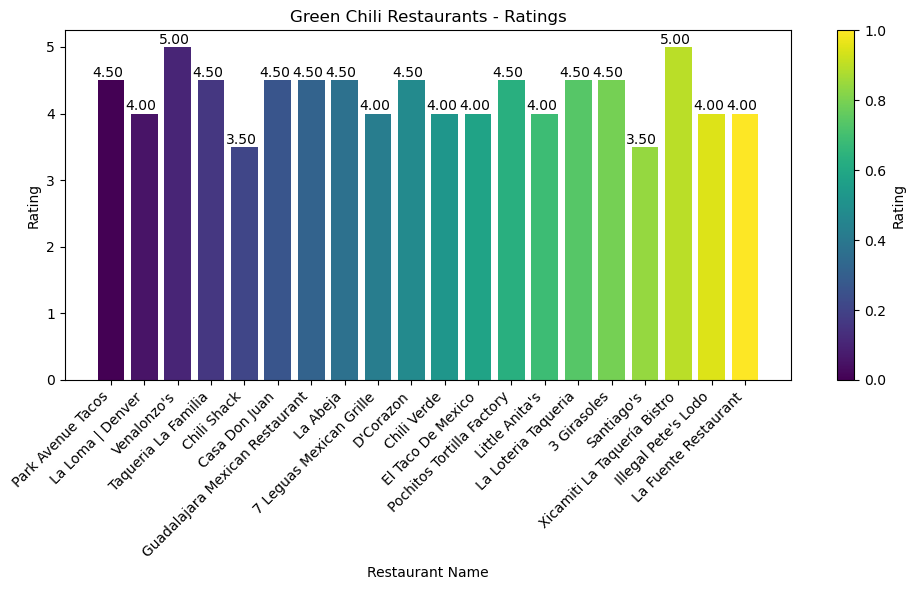

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'businesses' is the list of businesses from the Yelp API response
names = [business['name'] for business in businesses]
ratings = [business['rating'] for business in businesses]

# Define a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(ratings)))

# Plotting the bar graph with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(names, ratings, color=colors)
plt.xlabel('Restaurant Name')
plt.ylabel('Rating')
plt.title('Green Chili Restaurants - Ratings')
plt.xticks(rotation=45, ha='right')

# Add a colorbar to show the mapping of ratings to colors
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cbar.set_label('Rating')

# Add labels to each bar with the corresponding rating
for bar, rating in zip(bars, ratings):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f'{rating:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [7]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional Imports
import os, json, math, time
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [22]:
## Check if JSON_FILE exists
file_exists = os.path.isfile(JSON_FILE)
## If it does not exist: 
if file_exists == False:
    
    ## CREATE ANY NEEDED FOLDERS
    # Get the Folder Name only
    folder = os.path.dirname(JSON_FILE)
    ## If JSON_FILE included a folder:
    if len(folder)>0:
        # create the folder
        os.makedirs(folder,exist_ok=True)
        
        
    ## INFORM USER AND SAVE EMPTY LIST
    print(f'[i] {JSON_FILE} not found. Saving empty list to file.')
    
    
    # save an empty list
    with open(JSON_FILE,'w') as f:
        json.dump([],f)  
# If it exists, inform user
else:
    print(f"[i] {JSON_FILE} already exists.")

[i] Data/results_in_progress_Denver_Green_Chili.json not found. Saving empty list to file.


In [23]:
## Load previous results and use len of results for offset
with open(JSON_FILE,'r') as f:
    previous_results = json.load(f)
    
## set offset based on previous results
n_results = len(previous_results)
print(f'- {n_results} previous results found.')

- 0 previous results found.


In [25]:
# use our yelp_api variable's search_query method to perform our API call
LOCATION = 'Denver'
TERM = 'Green Chili'
results = yelp_api.search_query(location=LOCATION,
                                term=TERM,
                               offset=n_results)
results.keys()

dict_keys(['businesses', 'total', 'region'])

In [26]:
## How many results total?
total_results = results['total']
total_results

683

In [27]:
## How many did we get the details for?
results_per_page = len(results['businesses'])
results_per_page

20

In [28]:
# Import additional packages for controlling our loop
import time, math
# Use math.ceil to round up for the total number of pages of results.
n_pages = math.ceil((results['total']-n_results)/ results_per_page)
n_pages

35

In [29]:
# join new results with old list with extend and save to file
previous_results.extend(results['businesses'])  
with open(JSON_FILE,'w') as f:
     json.dump(previous_results,f)

In [30]:
from tqdm.notebook import tqdm_notebook
import time
for i in tqdm_notebook(range(n_pages)):
    # adds 200 ms pause
    time.sleep(.2) 

  0%|          | 0/35 [00:00<?, ?it/s]

In [31]:
for i in tqdm_notebook( range(1,n_pages+1)):
    
    ## Read in results in progress file and check the length
    with open(JSON_FILE, 'r') as f:
        previous_results = json.load(f)
    ## save number of results for to use as offset
    n_results = len(previous_results)
    ## use n_results as the OFFSET 
    results = yelp_api.search_query(location=LOCATION,
                                    term=TERM, 
                                    offset=n_results)
    
    ## append new results and save to file
    previous_results.extend(results['businesses'])
    
    with open(JSON_FILE,'w') as f:
        json.dump(previous_results,f)
    
    # add a 200ms pause
    time.sleep(.2)

  0%|          | 0/35 [00:00<?, ?it/s]

In [32]:
## delete file and confirm it no longer exits.
os.remove(JSON_FILE)
os.path.isfile(JSON_FILE)

False

In [33]:
def create_json_file(JSON_FILE,  delete_if_exists=False):
    
    ## Check if JSON_FILE exists
    file_exists = os.path.isfile(JSON_FILE)
    
    ## If it DOES exist:
    if file_exists == True:
        
        ## Check if user wants to delete if exists
        if delete_if_exists==True:
            
            print(f"[!] {JSON_FILE} already exists. Deleting previous file...")
            ## delete file and confirm it no longer exits.
            os.remove(JSON_FILE)
            ## Recursive call to function after old file deleted
            create_json_file(JSON_FILE,delete_if_exists=False)
        else:
            print(f"[i] {JSON_FILE} already exists.")            
            
            
    ## If it does NOT exist:
    else:
        
        ## INFORM USER AND SAVE EMPTY LIST
        print(f"[i] {JSON_FILE} not found. Saving empty list to new file.")
        
        ## CREATE ANY NEEDED FOLDERS
        # Get the Folder Name only
        folder = os.path.dirname(JSON_FILE)
        
        ## If JSON_FILE included a folder:
        if len(folder)>0:
            # create the folder
            os.makedirs(folder,exist_ok=True)
        ## Save empty list to start the json file
        with open(JSON_FILE,'w') as f:
            json.dump([],f)  

In [34]:
## Create a new empty json file (exist the previous if it exists)
create_json_file(JSON_FILE, delete_if_exists=True)
## Load previous results and use len of results for offset
with open(JSON_FILE,'r') as f:
    previous_results = json.load(f)
    
## set offset based on previous results
n_results = len(previous_results)
print(f'- {n_results} previous results found.')
# use our yelp_api variable's search_query method to perform our API call
results = yelp_api.search_query(location=LOCATION,
                                term=TERM,
                               offset=n_results)
## How many results total?
total_results = results['total']
## How many did we get the details for?
results_per_page = len(results['businesses'])
# Use math.ceil to round up for the total number of pages of results.
n_pages = math.ceil((results['total']-n_results)/ results_per_page)
n_pages

[i] Data/results_in_progress_Denver_Green_Chili.json not found. Saving empty list to new file.
- 0 previous results found.


35

In [35]:
for i in tqdm_notebook( range(1,n_pages+1)):
    
    ## Read in results in progress file and check the length
    with open(JSON_FILE, 'r') as f:
        previous_results = json.load(f)
    ## save number of results for to use as offset
    n_results = len(previous_results)
    
    if (n_results + results_per_page) > 1000:
        print('Exceeded 1000 api calls. Stopping loop.')
        break
    
    ## use n_results as the OFFSET 
    results = yelp_api.search_query(location=LOCATION,
                                    term=TERM, 
                                    offset=n_results)
    
    
    
    ## append new results and save to file
    previous_results.extend(results['businesses'])
    
    # display(previous_results)
    with open(JSON_FILE,'w') as f:
        json.dump(previous_results,f)
    
    time.sleep(.2)

  0%|          | 0/35 [00:00<?, ?it/s]

In [36]:
# load final results
final_df = pd.read_json(JSON_FILE)
display(final_df.head(), final_df.tail())

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,K2fzLQ4DjVQvwYRokP4kDA,park-avenue-tacos-denver,Park Avenue Tacos,https://s3-media1.fl.yelpcdn.com/bphoto/FfFv2L...,False,https://www.yelp.com/biz/park-avenue-tacos-den...,28,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.5,"{'latitude': 39.740503, 'longitude': -104.97252}","[delivery, pickup]","{'address1': '1521 N Marion St', 'address2': '...",+17203612137,(720) 361-2137,592.267347,NaN
1,WTe8uL6vF1ZuKAeJIvxR8w,la-loma-denver-denver,La Loma | Denver,https://s3-media4.fl.yelpcdn.com/bphoto/pJngNB...,False,https://www.yelp.com/biz/la-loma-denver-denver...,1885,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",4.0,"{'latitude': 39.74493, 'longitude': -104.98781}","[delivery, pickup]","{'address1': '1801 Broadway', 'address2': 'Uni...",+13034338300,(303) 433-8300,1831.625871,$$
2,5-Y6ioHcfRy-eCBZtU6rHw,venalonzos-centennial-2,Venalonzo's,https://s3-media3.fl.yelpcdn.com/bphoto/5ovmws...,False,https://www.yelp.com/biz/venalonzos-centennial...,249,"[{'alias': 'tacos', 'title': 'Tacos'}, {'alias...",5.0,"{'latitude': 39.5920055, 'longitude': -104.886...",[],"{'address1': '6830 S Yosemite St', 'address2':...",+17209236926,(720) 923-6926,17415.141562,$
3,fbb7fsCGVMVkavIMm7_8KQ,taqueria-la-familia-denver,Taqueria La Familia,https://s3-media2.fl.yelpcdn.com/bphoto/VkLvsn...,False,https://www.yelp.com/biz/taqueria-la-familia-d...,456,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 39.761887, 'longitude': -105.020065}",[delivery],"{'address1': '2642 W 32nd Ave', 'address2': ''...",+13034332332,(303) 433-2332,5170.503060,$$
4,hKvMSZNMh6sEciDelv5iww,chili-shack-denver,Chili Shack,https://s3-media1.fl.yelpcdn.com/bphoto/RaHBhI...,False,https://www.yelp.com/biz/chili-shack-denver?ad...,56,"[{'alias': 'mexican', 'title': 'Mexican'}]",3.5,"{'latitude': 39.7404724657143, 'longitude': -1...","[delivery, pickup]","{'address1': '8809 W Colfax Ave', 'address2': ...",+13032747800,(303) 274-7800,10824.157437,NaN


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
677,k7SOpDoSevoADOajJbchEg,chipotle-mexican-grill-aurora-7,Chipotle Mexican Grill,https://s3-media2.fl.yelpcdn.com/bphoto/e1CfV_...,False,https://www.yelp.com/biz/chipotle-mexican-gril...,130,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",2.0,"{'latitude': 39.604272012876336, 'longitude': ...","[delivery, pickup]","{'address1': '24100 E Commons Ave', 'address2'...",+13034003855,(303) 400-3855,26802.845805,$
678,eoO4Fwjt5PnDjoNz6A8W6A,chipotle-mexican-grill-lone-tree-5,Chipotle Mexican Grill,https://s3-media2.fl.yelpcdn.com/bphoto/5MDZ9G...,False,https://www.yelp.com/biz/chipotle-mexican-gril...,95,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",2.5,"{'latitude': 39.53712395324733, 'longitude': -...","[delivery, pickup]","{'address1': '9500 Heritage Hills Cir', 'addre...",+13037920611,(303) 792-0611,23390.409715,$
679,7gZHiYGfRB6mChsqfeeO7Q,chipotle-mexican-grill-parker,Chipotle Mexican Grill,https://s3-media4.fl.yelpcdn.com/bphoto/F9xWip...,False,https://www.yelp.com/biz/chipotle-mexican-gril...,147,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",2.0,"{'latitude': 39.518703, 'longitude': -104.770403}","[delivery, pickup]","{'address1': '18701 E Mainstreet', 'address2':...",+17208515050,(720) 851-5050,29566.734061,$
680,0gpK7_BMz1wU7sbrxBu79g,chipotle-mexican-grill-aurora-2,Chipotle Mexican Grill,https://s3-media4.fl.yelpcdn.com/bphoto/n3aHZb...,False,https://www.yelp.com/biz/chipotle-mexican-gril...,119,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",2.0,"{'latitude': 39.6402042077806, 'longitude': -1...","[pickup, delivery]","{'address1': '4205 S Buckley Rd', 'address2': ...",+17208703342,(720) 870-3342,18569.999489,$
681,bqXPhcn6MRcMNLrGvlCUEw,chipotle-mexican-grill-louisville-4,Chipotle Mexican Grill,https://s3-media3.fl.yelpcdn.com/bphoto/JNtc3V...,False,https://www.yelp.com/biz/chipotle-mexican-gril...,70,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",3.0,"{'latitude': 39.966218, 'longitude': -105.1639...","[pickup, delivery]","{'address1': '375 Mccaslin Blvd', 'address2': ...",+17208900670,(720) 890-0670,30520.656698,$


In [41]:
# save the final results to a compressed csv
final_df.to_csv('Data/results_in_progress_Denver_Green_Chili.json', compression='gzip',index=False)